Student Number: GH1043274

Student Name: Carl Jhon D. Odicta

Assessment Title: Global Passenger Data Exploration

Module Code: M504B

Module Title: AI and Applications

Module Tutor: Prof. Amirhossein Jamalian

Date Submitted: Jan 8, 2026 (Resubmission)

# **Global Passenger Data Exploration**

**Business Case**

As a data science consultant for the International Air Transport Association (IATA), our goal is to explore global passenger data to understand passenger behavior and flight trends. The insights will help IATA and airlines prepare for industry growth, optimize operations, and tailor marketing strategies.

We will analyze the “Airline Dataset” (synthetic dataset) to investigate passenger characteristics, flight patterns, airport reliability, and international travel routes.

**Dataset**

We were given the "Airline Dataset" to do our analysis on. Despite it's name, it is more of a passenger dataset since each rows is associated with a passenger flight details.

The dataset has the following variables:
"
* Passenger ID - Unique identifier for each passenger
* First Name - First name of the passenger
* Last Name - Last name of the passenger
* Gender - Gender of the passenger
* Age - Age of the passenger
* Nationality - Nationality of the passenger
* Airport Name - Name of the airport where the passenger boarded
* Airport Country Code - Country code of the airport's location
* Country Name - Name of the country the airport is located in
* Airport Continent - Continent where the airport is situated (3 letter code)
* Continents - Continents involved in the flight route
* Departure Date - Date when the flight departed. This dataset only includes 2022 data.
* Arrival Airport - Destination airport of the flight. (3 letter iata code)
* Pilot Name - Name of the pilot operating the flight
* Flight Status - Current status of the flight
"

Sources:

- Airline Dataset: [Kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/airline-dataset/data)  
- Airports Dataset (for IATA code mapping): [OurAirports](https://ourairports.com/help/data-dictionary.html)

**Business Questions**

We aim to answer the following questions:

1. How frequently do passengers and pilots fly in 2022?  
   -Helps in identifying high-value passengers and pilot workload

2. What is the distribution of passengers by age and gender?  
   -Assess target demographics

3. Which countries and nationalities have the most passengers?  
   -Supports route planning and infrastructure growth strategies

4. What are the monthly trends in flights and delays?  
   -Identifies seasonal effects and assess on-time performance

5. Which airports are most reliable?  
   -Guides operational improvements and customer satisfaction initiatives

6. Which international routes carry the most passengers?  
   -Extension of question 1. Can help optimize route capacity and pricing strategies

7. How does airport traffic and passenger demographics relate to flight reliability?  
   -Correlation analysis to support airports with reliability issues

**Preparation and Data Cleaning**

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_org = pd.read_csv("Airline Dataset Updated - v2.csv")
df = df_org.copy()

# Inspect dataset
print("Dataset shape:", df.shape)
display(df.head(3))

Dataset shape: (98619, 15)


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time


Before analysis, we prepare the dataset by handling missing values, converting types, and creating new features for easier exploration.
Since the dataset is mostly clean, we simulate missing values to demonstrate proper data cleaning techniques.

**Injecting Missing Values to Demonstrate Cleaning**

In [ ]:
# Inject 1000 random NaNs
num_injections = 1000
for _ in range(num_injections):
    row_idx = np.random.randint(0, df.shape[0])
    col_idx = np.random.randint(0, df.shape[1])
    df.iat[row_idx, col_idx] = np.nan

print("Missing values after injection:")
display(df.isna().sum())

Missing values after injection:


,0
Passenger ID,78
First Name,82
Last Name,65
Gender,55
Age,54
Nationality,73
Airport Name,59
Airport Country Code,56
Country Name,78
Airport Continent,70


**Data Cleaning and Preprocessing**

Before we conduct our analysis, we will clean and preprocess the dataset to ensure accuracy.

Key considerations:
- **Attributes** - (e.g., age, gender) can be imputed.
- **Identifiers** - (Passenger ID, Pilot Name) must never be imputed.
- **High-cardinality fields** - (Airports, Pilots) should not be mode-imputed to avoid artificial clustering.

In [ ]:
# Fill numeric missing values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill low-cardinality categorical fields with mode
low_card_cat_cols = ['Gender', 'Nationality', 'Flight Status']
for col in low_card_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill airport-related fields using the first non-null value per airport code
airport_info = (
    df[['Airport Country Code', 'Country Name', 'Airport Continent', 'Continents']]
      .dropna(subset=['Airport Country Code'])
      .drop_duplicates(subset=['Airport Country Code'])
      .set_index('Airport Country Code')
)

def fill_airport_info(row):
    code = row['Airport Country Code']
    if code in airport_info.index:
        if pd.isna(row['Country Name']):
            row['Country Name'] = airport_info.at[code, 'Country Name']
        if pd.isna(row['Airport Continent']):
            row['Airport Continent'] = airport_info.at[code, 'Airport Continent']
        if pd.isna(row['Continents']):
            row['Continents'] = airport_info.at[code, 'Continents']
    return row

df = df.apply(fill_airport_info, axis=1)

# Drop remaining rows with NaNs
critical_cols = [
    'Passenger ID', 'First Name', 'Last Name',
    'Airport Name', 'Airport Country Code', 'Departure Date',
    'Arrival Airport', 'Pilot Name', 'Country Name',
    'Airport Continent', 'Continents'
]

df.dropna(subset=critical_cols, inplace=True)

# Display
print("Missing values after full cleaning:")
display(df.isna().sum())
print(f"Total missing values remaining: {df.isna().sum().sum()}")

Missing values after full cleaning:


,0
Passenger ID,0
First Name,0
Last Name,0
Gender,0
Age,0
Nationality,0
Airport Name,0
Airport Country Code,0
Country Name,0
Airport Continent,0


Total missing values remaining: 0


This cleaning process demonstrates real-world data preparation by handling missing values, understanding the nature of each feature and apply appropriate pre-processing to preserve data integrity and avoid data that doesn't make logical sense.

Now that we have cleaned and pre-processed our dataset, we can proceed with answering our business questions through EDA.

**Exploratory Data Analysis (EDA)**

**1. Passenger and Pilot Flight Frequency**

Understanding passenger flight frequency helps airlines identify frequent flyers, strategize marketing, and forecast demand. on the other hand, Pilot flight frequency informs workload distribution and help in operational planning

Here, we will create a unique passenger identifier by combining first and last names. Then we count flights per passenger and per pilot, and Calculate average flights and identify top passengers/pilots.

In [ ]:
# Passenger Flight Frequency
df['Person'] = df['First Name'] + ' ' + df['Last Name']

flights_per_person = (
    df.groupby('Person')
      .size()
      .reset_index(name='Total_Flights')
)

avg_passenger_flights = flights_per_person['Total_Flights'].mean()
print(f"Average flights per passenger in 2022: {avg_passenger_flights:.2f}")

top_passengers = flights_per_person.sort_values(
    by='Total_Flights', ascending=False
).head(5)

display(top_passengers)

# Pilot Flight Frequency
flights_per_pilot = (
    df.groupby('Pilot Name')
      .size()
      .reset_index(name='Total_Flights')
)

avg_pilot_flights = flights_per_pilot['Total_Flights'].mean()
print(f"Average flights per pilot in 2022: {avg_pilot_flights:.2f}")

top_pilots = flights_per_pilot.sort_values(
    by='Total_Flights', ascending=False
).head(5)

display(top_pilots)

Average flights per passenger in 2022: 1.00


,Person,Total_Flights
31923,Ertha Feldbaum,2
74920,Perry Burhouse,2
23053,Damian Garnsey,2
72369,Ollie Sidle,2
18409,Christabella Reubbens,2


Average flights per pilot in 2022: 1.00


,Pilot Name,Total_Flights
2765,Aline Delap,2
52067,Karalynn Taile,2
73684,Otes Horsey,2
72695,Ofilia MacTeggart,2
51924,Kally Askell,2


**Passengers:** Most passengers flew only once in 2022 while A very small number of passengers flew twice, as shown by the top 5 passengers. Average flights per passenger is 1 meaning repeat travel is rare.

**Pilots:** Most pilots also appear on only one flight in the year, with a few flying twice. The average flights per pilot is also 1, showing minimal distribution of operational load.

This results can be attributed to the synthetic nature of the dataset hence the low variability.

**2. Passenger Age and Gender Distribution**

This exploration is to visualize the passenger demographic in terms of age and gender. Knowing passenger stats can help in formulating operational and marketing strategies.

We will visualize the distributions using histograms and bar plots, and supplementing it with Boxplots to visualize age spread across genders.

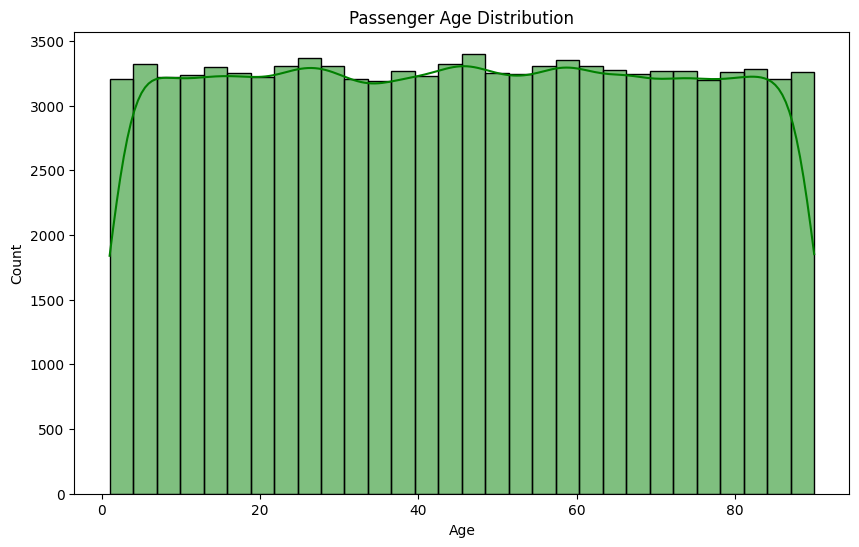

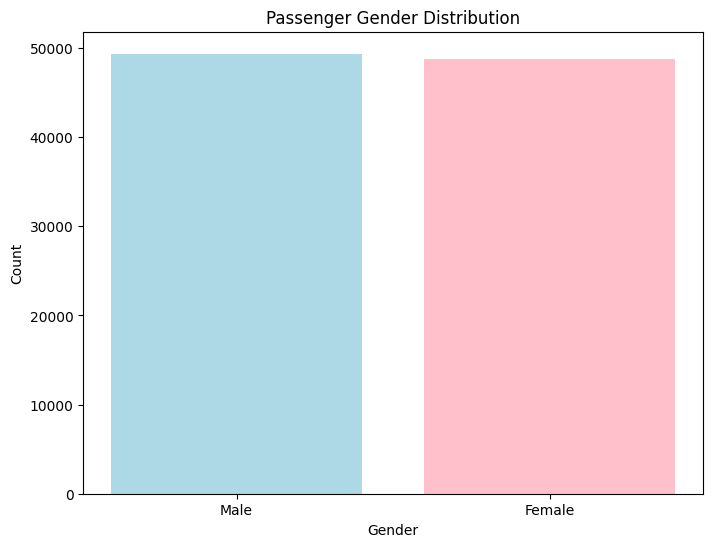

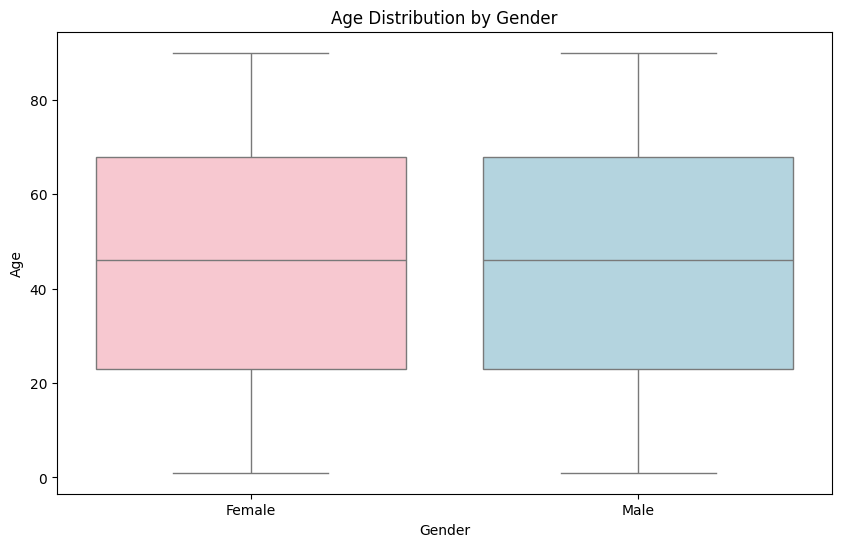

In [ ]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True, color='green')
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Gender Distribution
plt.figure(figsize=(8,6))
gender_color_map = {'Male': 'lightblue', 'Female': 'pink'}
for gender, color in gender_color_map.items():
    subset = df[df['Gender'] == gender]
    plt.bar(gender, subset.shape[0], color=color)

plt.title("Passenger Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Age Distribution by Gender
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Age', data=df, hue='Gender', palette=gender_color_map, dodge=False)
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.legend([],[], frameon=False)
plt.show()

The age distribution appears symmetric, with most passengers being adults. The gender distribution is also equal showing a roughly equal number of male and female passengers.

**3. Top 5 Countries and Nationalities**

Knowing which countries and nationalities travel the most can help airlines and IATA understand international travel patterns to optimize network planning.

We just count the number of passengers per country and nationality and get the top 5 for each, which we visualize using bar charts. Then to have the complete picture, we use heatmap to explore the relationship between passengers’ nationalities and the countries they travel from.

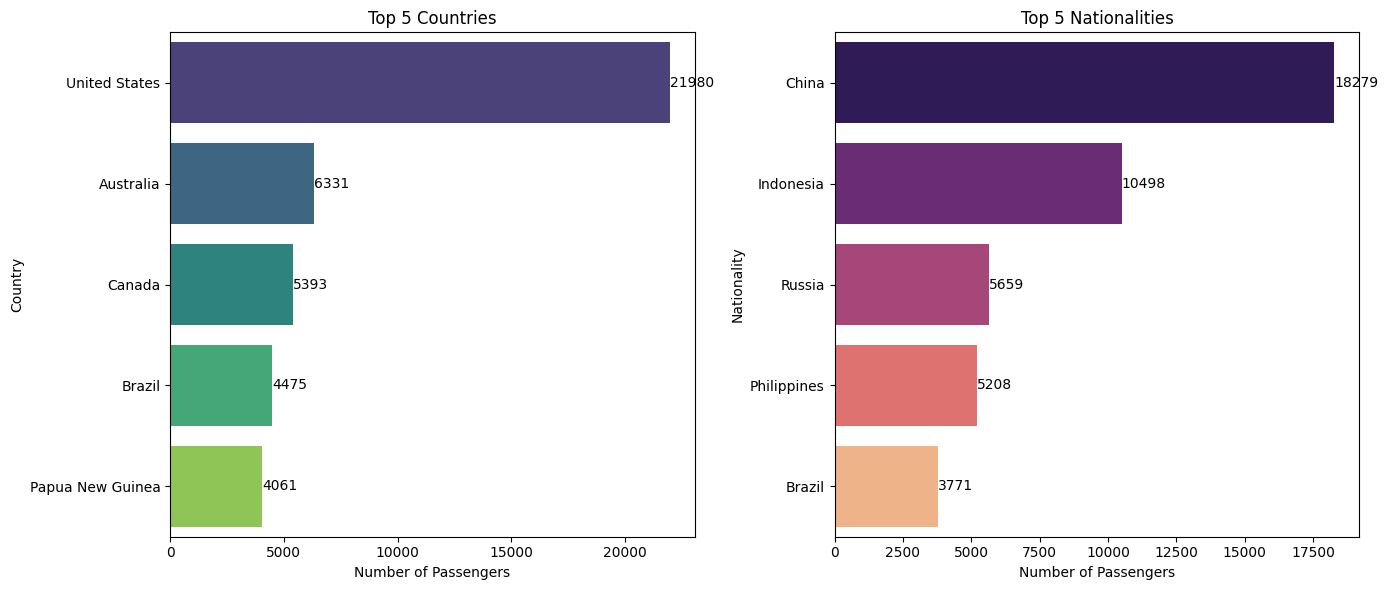

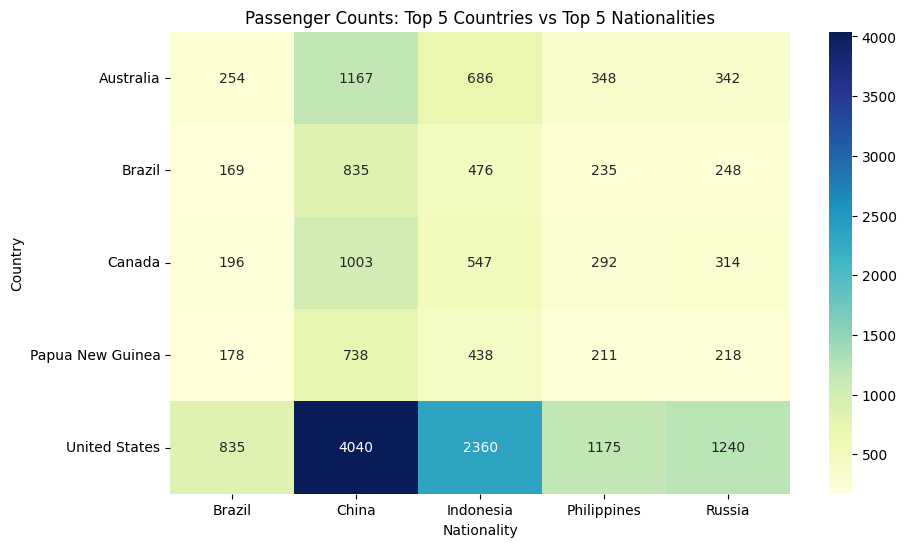

In [ ]:
# Top 5 Countries and Nationalities
top_countries = df['Country Name'].value_counts().head(5)
top_nationalities = df['Nationality'].value_counts().head(5)

plt.figure(figsize=(14,6))

# Top countries bar chart
plt.subplot(1,2,1)
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,
    dodge=False,
    palette="viridis",
    legend=False
)
plt.title("Top 5 Countries")
plt.xlabel("Number of Passengers")
plt.ylabel("Country")

for i, value in enumerate(top_countries.values):
    plt.text(value + 0.5, i, str(value), va='center')

# Top nationalities bar chart
plt.subplot(1,2,2)
sns.barplot(
    x=top_nationalities.values,
    y=top_nationalities.index,
    hue=top_nationalities.index,
    dodge=False,
    palette="magma",
    legend=False
)
plt.title("Top 5 Nationalities")
plt.xlabel("Number of Passengers")
plt.ylabel("Nationality")

for i, value in enumerate(top_nationalities.values):
    plt.text(value + 0.5, i, str(value), va='center')

plt.tight_layout()
plt.show()


# Heatmap of Passenger Counts by Country and Nationality
filtered_df = df[
    df['Country Name'].isin(top_countries.index) &
    df['Nationality'].isin(top_nationalities.index)
]

heatmap_data = filtered_df.pivot_table(
    index='Country Name',
    columns='Nationality',
    values='Passenger ID',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Passenger Counts: Top 5 Countries vs Top 5 Nationalities")
plt.xlabel("Nationality")
plt.ylabel("Country")
plt.show()

The top 5 countries for passengers are: United States, Australia, Canada, Brazil, and Papua New Guinea.

The top 5 nationalities are: China, Indonesia, Russia, Philippines, and Brazil.

There is mismatch between country and nationality, indicating that many passengers in developed countries are foreign nationals.

This is also reflective in the heatmap where we can see that chinese and indonesians are the top nationalities of passengers from the United States.

**4. Flight Trends and Status**

Knowing the monthly flight trends and the likelihood of delays or cancellations is crucial for airlines and airport operators. It helps optimize scheduling, allocate staff, improve operational efficiency, and manage passenger expectations. High delays or cancellation rates can also significantly affect customer satisfaction and airline reputation, this is why it is crucial that we can identify and plan ways to minimize it.

By computing total flights per month, delayed flight percentages, and the distribution of flight statuses, we can visualize monthly trends using line graph and distribution/probability per flight status using stacked bar charts.

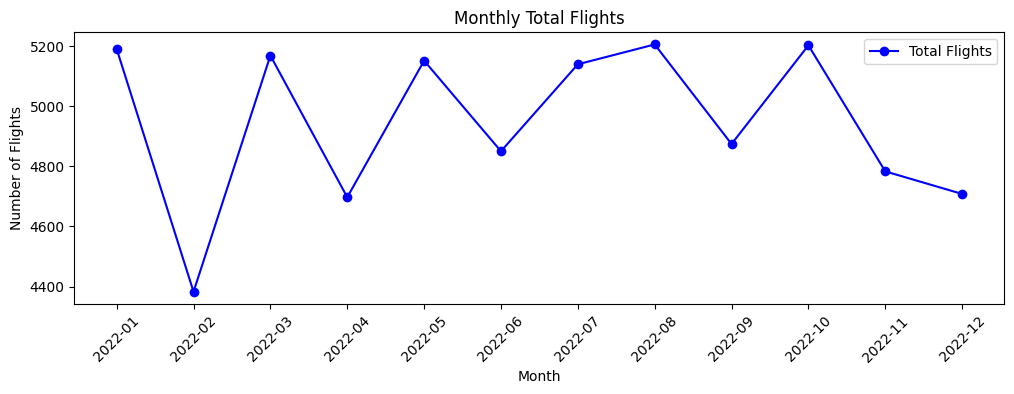

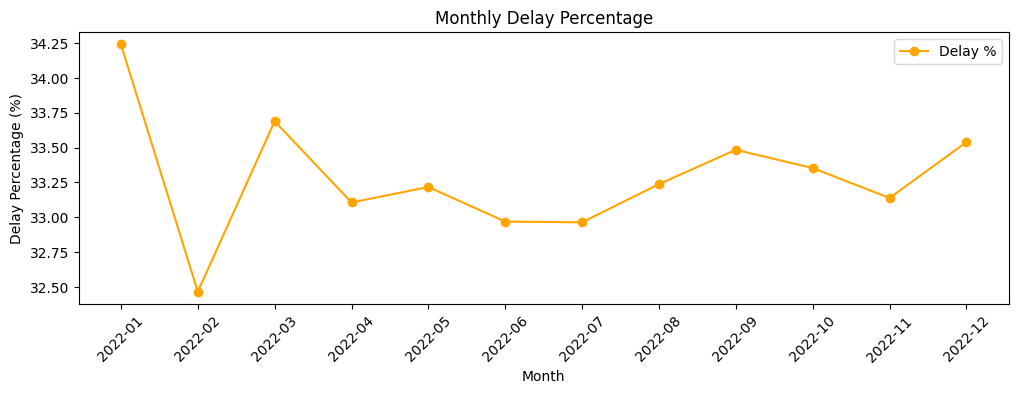

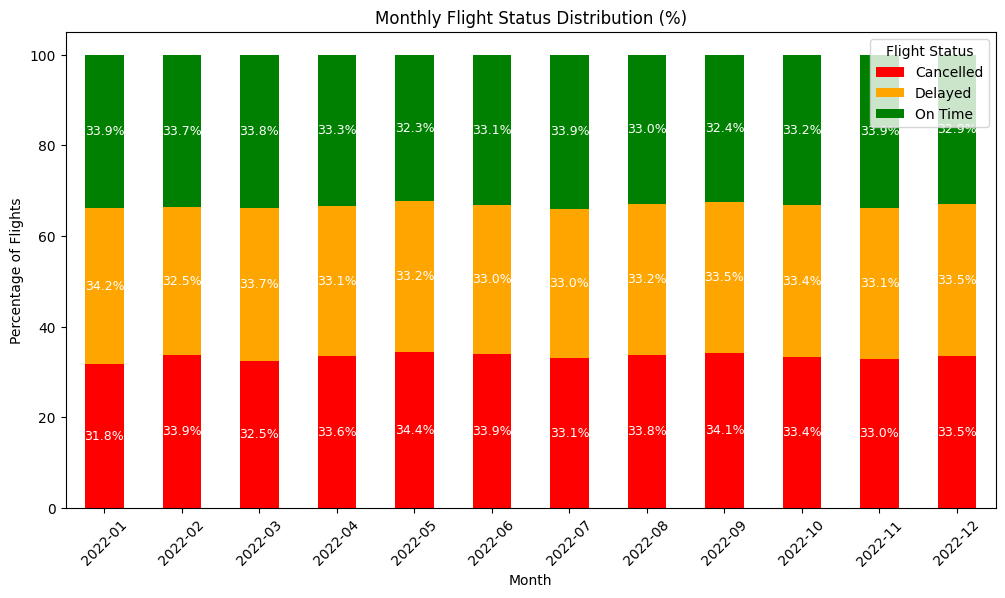

In [ ]:
# Create needed features and convert to datetime
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
df = df.dropna(subset=['Departure Date', 'Flight Status'])
df['Flight Status'] = df['Flight Status'].str.title()  # e.g., 'Delayed', 'On-Time', 'Cancelled'
df['Month'] = df['Departure Date'].dt.to_period('M')
status_counts = df.groupby(['Month', 'Flight Status'])['Passenger ID'].count().unstack(fill_value=0)

# Total Flights
total_flights = status_counts.sum(axis=1)
plt.figure(figsize=(12,4))
plt.plot(total_flights.index.astype(str), total_flights.values, marker='o', color='blue', label='Total Flights')
plt.title("Monthly Total Flights")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.legend()
plt.subplots_adjust(bottom=0.2)
plt.show()

# Percentage of Delayed Flights
delayed_flights = status_counts.get('Delayed', pd.Series(0, index=status_counts.index))
delay_percentage = (delayed_flights / total_flights * 100).fillna(0)
plt.figure(figsize=(12,4))
plt.plot(delay_percentage.index.astype(str), delay_percentage.values, marker='o', color='orange', label='Delay %')
plt.title("Monthly Delay Percentage")
plt.xlabel("Month")
plt.ylabel("Delay Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.subplots_adjust(bottom=0.2)
plt.show()

# Flight Status
status_percent = status_counts.div(status_counts.sum(axis=1), axis=0) * 100
colors = {'On Time': 'green', 'Delayed': 'orange', 'Cancelled': 'red'}
color_list = [colors.get(x, 'gray') for x in status_percent.columns]

ax = status_percent.plot(kind='bar', stacked=True, figsize=(12,7), color=color_list)
plt.title("Monthly Flight Status Distribution (%)")
plt.xlabel("Month")
plt.ylabel("Percentage of Flights")
plt.xticks(rotation=45)
plt.legend(title="Flight Status")

for i, month in enumerate(status_percent.index):
    bottom = 0
    for status in status_percent.columns:
        value = status_percent.loc[month, status]
        if value > 0:
            plt.text(i, bottom + value/2, f"{value:.1f}%", ha='center', va='center', color='white', fontsize=9)
            bottom += value

# Visualization
plt.subplots_adjust(bottom=0.2)
plt.show()

Monthly total flights range is around 4k-6k, with the month of February showing the lowest activity.

Percentage of delayed flights is roughly constant at 30–35% across all months, and Flight status distribution shows roughly equal probabilities (~30%) of a flight being on-time, delayed, or cancelled. Again, this is due to the dataset's synthetic nature and is not reflective of reality.

**5. Airport Reliability**

Reliability is defined here as the probability of a flight being on-time for departures or arrivals. Knowing which airports are operationaly reliable can help manage passenger expectations.

Here we map each flights per airport departures and arrivals using the airports dataset then we calculate reliability (%) for each.

In [ ]:
MIN_PASSENGERS = 10 #Filter minimum number of passengers
airports = pd.read_csv('/content/airports.csv', dtype=str)

# Reference table for Country Map
country_map = df[['Airport Country Code', 'Country Name']].drop_duplicates()

# Departure Airport Reliability
departure = (
    df.groupby('Airport Name', as_index=False)
      .agg(
          Total_Passengers=('Passenger ID', 'count'),
          On_Time_Passengers=('Flight Status', lambda x: (x == 'On Time').sum()),
          Airport_Country_Code=('Airport Country Code', 'first')
      )
      .merge(country_map, left_on='Airport_Country_Code', right_on='Airport Country Code', how='left')
)

departure = departure[departure['Total_Passengers'] >= MIN_PASSENGERS]
departure['Reliability (%)'] = (departure['On_Time_Passengers'] / departure['Total_Passengers'] * 100).round(2)

departure_top5 = departure.sort_values(['Reliability (%)', 'On_Time_Passengers'], ascending=[False, False]).head(5)

print("Top 5 Departure Airports by Reliability\n")
print(departure_top5[['Airport Name', 'Country Name', 'Total_Passengers', 'On_Time_Passengers', 'Reliability (%)']].to_string(index=False))
print("\n" + "-"*130 + "\n")

# Arrival Airport Reliability
arrival = (
    df.groupby('Arrival Airport', as_index=False)
      .agg(
          Total_Passengers=('Passenger ID', 'count'),
          On_Time_Passengers=('Flight Status', lambda x: (x == 'On Time').sum())
      )
)

arrival = arrival[arrival['Total_Passengers'] >= MIN_PASSENGERS]
arrival['Reliability (%)'] = (arrival['On_Time_Passengers'] / arrival['Total_Passengers'] * 100).round(2)

  # Mapping of Airport Name
arrival = arrival.merge(
    airports[['iata_code', 'name', 'iso_country']],
    left_on='Arrival Airport',
    right_on='iata_code',
    how='left'
).rename(columns={'name': 'Airport Name', 'iso_country': 'Airport Country Code'})

  # Mapping of Country Name
arrival = arrival.merge(country_map, on='Airport Country Code', how='left')

  # correction for missing values
arrival['Airport Name'] = arrival['Airport Name'].fillna(arrival['Arrival Airport'])
arrival['Country Name'] = arrival['Country Name'].fillna('Unknown')

arrival_top5 = arrival.sort_values(['Reliability (%)', 'On_Time_Passengers'], ascending=[False, False]).head(5)

print("Top 5 Arrival Airports by Reliability (with full name + country)\n")
print(arrival_top5[['Airport Name', 'Country Name', 'Total_Passengers', 'On_Time_Passengers', 'Reliability (%)']].to_string(index=False))

Top 5 Departure Airports by Reliability

                     Airport Name                          Country Name  Total_Passengers  On_Time_Passengers  Reliability (%)
Sulphur Springs Municipal Airport                         United States                10                   8            80.00
                Jeongseok Airport                    Korea, Republic of                12                   9            75.00
                  Machado Airport                                Brazil                12                   9            75.00
              N'Kolo-Fuma Airport Congo, The Democratic Republic of the                11                   8            72.73
               Ouro Sogui Airport                               Senegal                11                   8            72.73

----------------------------------------------------------------------------------------------------------------------------------

Top 5 Arrival Airports by Reliability (with full name + country)

For Airports with more than 10 passengers,

Sulphur Springs Municipal Airport in the United States is the most reliable Airport to depart from at 80%.

Sulphur Springs Municipal Airport in the United States is also the most reliable Airport to arrive to at 80%.

**6. Route Analysis**

Identifying which international routes carry the most passengers helps airlines and IATA optimize scheduling, allocate resources efficiently, and identify key revenue-generating routes.

Here we will identify international flights by mapping IATA airport codes to country codes and then to country names. Then we rank routes by number of passengers to find the top 10 busiest international connections.

In [ ]:
# Load datasets
airline_df = pd.read_csv("/content/Airline Dataset Updated - v2.csv")
airports_df = pd.read_csv("/content/airports.csv")

# Mapping
airline_df['Departure Country Name'] = airline_df['Country Name']

airport_to_country_code = airports_df[['iata_code', 'iso_country']].dropna(subset=['iata_code']).set_index('iata_code')['iso_country'].to_dict()
airline_df['Arrival Country Code Temp'] = airline_df['Arrival Airport'].map(airport_to_country_code)

country_code_to_name = airline_df[['Airport Country Code', 'Country Name']].drop_duplicates().set_index('Airport Country Code')['Country Name'].to_dict()

airline_df['Arrival Country Name'] = airline_df['Arrival Country Code Temp'].map(country_code_to_name)

# Count rows before filtering
rows_before = len(airline_df)

# Count and remove rows with missing arrival country
missing_arrival = airline_df['Arrival Country Name'].isna().sum()
airline_df = airline_df.dropna(subset=['Arrival Country Name'])

# Count and remove domestic flights
domestic_flights = (airline_df['Departure Country Name'] == airline_df['Arrival Country Name']).sum()
airline_df = airline_df[airline_df['Departure Country Name'] != airline_df['Arrival Country Name']]

# Count rows after filtering
rows_after = len(airline_df)
rows_dropped_total = rows_before - rows_after

# Summary
print(f"Total rows before filtering: {rows_before}")
print(f"Rows dropped due to missing arrival country: {missing_arrival}")
print(f"Rows dropped due to domestic flights: {domestic_flights}")
print(f"Total rows dropped: {rows_dropped_total}")
print(f"Rows remaining (international flights with known arrival country): {rows_after}\n")

# Route
airline_df['Route'] = airline_df['Departure Country Name'] + " - " + airline_df['Arrival Country Name']

route_counts = airline_df.groupby('Route').size().reset_index(name='Flight Count')

route_counts = route_counts.sort_values(by='Flight Count', ascending=False)

# Display top 10 international routes
print(route_counts.head(10))

Total rows before filtering: 98619
Rows dropped due to missing arrival country: 5632
Rows dropped due to domestic flights: 92415
Total rows dropped: 98047
Rows remaining (international flights with known arrival country): 572

                             Route  Flight Count
36           United States - China            39
39       United States - Indonesia            33
35          United States - Brazil            20
38           United States - Egypt            17
16         Indonesia - Timor-Leste            17
42         United States - Myanmar            16
25              Pakistan - Czechia            16
15  Indonesia - Russian Federation            15
17        Indonesia - Turkmenistan            15
41      United States - Kyrgyzstan            14


Majority of the passengers travelled domestically (~94%).

For international flights, US-China is the route with most passenger.

**7. Airport-level correlation**

Understanding whether certain airport metrics can be associated with delays or cancellations. Knowing these patterns can help with staffing, scheduling, and operational policies.

Because passenger-level correlations were statistically weak due to limited repeat travel, an airport-level aggregation was used to produce more meaningful insights. So first, we aggregate flight-level metrics to airport level (total flights, on-time, delayed, cancelled, average passenger age and then calculate for derived rates (on-time rate, delay rate, cancellation rate). Next, is to calculate Pearson correlations between numeric airport metrics to uncover relationships and visualize the results using a heatmap.

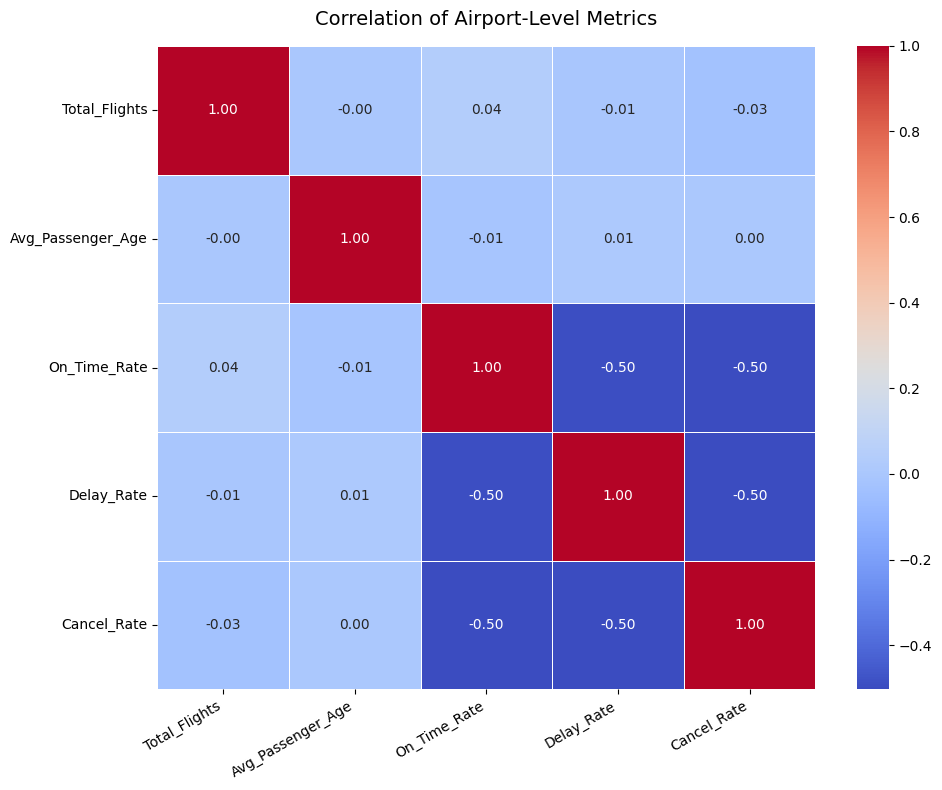

In [ ]:
# Aggregate metrics per Departure Airport
airport_agg = df.groupby('Airport Name').agg(
    Total_Flights=('Passenger ID', 'count'),
    On_Time_Flights=('Flight Status', lambda x: (x == 'On Time').sum()),
    Delayed_Flights=('Flight Status', lambda x: (x == 'Delayed').sum()),
    Cancelled_Flights=('Flight Status', lambda x: (x == 'Cancelled').sum()),
    Avg_Passenger_Age=('Age', 'mean')
).reset_index()

# Calculate rates
airport_agg['On_Time_Rate'] = airport_agg['On_Time_Flights'] / airport_agg['Total_Flights']
airport_agg['Delay_Rate'] = airport_agg['Delayed_Flights'] / airport_agg['Total_Flights']
airport_agg['Cancel_Rate'] = airport_agg['Cancelled_Flights'] / airport_agg['Total_Flights']

# Correlation analysis
numeric_cols = [
    'Total_Flights',
    'Avg_Passenger_Age',
    'On_Time_Rate',
    'Delay_Rate',
    'Cancel_Rate'
]
corr_matrix = airport_agg[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    annot_kws={"size": 10}
)

plt.title("Correlation of Airport-Level Metrics", fontsize=14, pad=15)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

The results show that airport traffic volume has no meaningful impact on reliability. Total flights have near-zero correlation with on-time, delay, and cancellation rates, indicating that busier airports are not more prone to delays or cancellations. Passenger demographics also show no influence, as average passenger age has virtually no relationship with any reliability metric.

The only strong and meaningful relationships are between the reliability measures themselves. On-time rate is moderately and negatively correlated with both delay and cancellation rates (≈ −0.5), confirming that airports with better on-time performance experience fewer disruptions.

Again, these results are due to the dataset being synthetic and not representative of real scenario.

**Results**

From our analysis in answering the seven(7) business questions provided we obtained clear insights on passenger behavior (for year 2022) and have observed the following results:
1. A passenger travelled only once a year, on average.
2. Passengers are evenly distributed across age and gender
3. Passengers travel more often to more developed countries (i.e. US, Australia, Canada) and are more often Asian by nationality (i.e. Chinese, Indonesian, Filipino)
4. The chances your flight to be on-time, delayed, or cancelled are almost equal (~30%-35%), this is constant regardless of month of year.
5. Airports from the US are more reliable, meaning a higher chance for your flight to be on-time.
6. Majority of the passengers travel domestically (~94%). and majority of the Passengers who travel internationally are coming from the United States.
7. Airport traffic volume has no significant relationship with airport reliability, and there is a moderate negative correlation between on-time, delay, and cancellation rates.

**Business Recommendations**

Based on the results of this analysis we can make the following business recommendations:
1. Devise strategies to encourage passengers to travel again. Most common of these strategy is to introduce loyalty rewards and bundles.
2. Efforts targetting a specific age group or gender will be less effective given that all are equally represented. Instead focus on more generalized approach.
3. Focus efforts on improving passenger capacity for less developed countries to be able to accommodate more passengers. Such as in Asian countries where they are observed to travel more.
4. For the passengers - Always be ready for a possibility of a delayed or cancelled flights....unfortunately. For the airlines - they need to put extreme efforts to reduce cancellations and delays.
5. Promote International travel.
6. Prioritize operational efficiency over capacity expansion

**Limitations**

This exploration used the Airline Dataset from Kaggle and unfortunately, is a synthetic dataset. This means that the results may not be reflective of real world behavior.

I would like to leave this note here because based on my personal experience working in an airline company, results are very much different. For example of such difference is that in actual passenger data, there is always a strong seasonal effect, also flight cancellation is rare to happen, and many more differences.